In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving wine.csv to wine (3).csv
User uploaded file "wine.csv" with length 12089 bytes


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.pipeline import make_pipeline

In [ ]:
SEED = 42
from tensorflow.random import set_seed
from numpy.random import seed
seed(SEED)
set_seed(SEED)

In [ ]:
df = pd.read_csv('wine.csv')  #, header = None
df = df.values


In [ ]:
X = df[:,1:14].astype(float)
Y = df[:,0]
print ('X Shape :', X.shape)
print ('Y Shape :', Y.shape)
print ('Number of Unique Values in Y:', set(Y))

X Shape : (178, 13)
Y Shape : (178,)
Number of Unique Values in Y: {1.0, 2.0, 3.0}


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
Y_encoded = encoder.fit_transform(Y).astype(int)
print ('Shape of Y_encoded :', len(Y_encoded))
print ('Unique values in Y_encoded :', list(set(Y_encoded)))
print ('Inverse transforming : ', encoder.inverse_transform(list(set(Y_encoded))))

Shape of Y_encoded : 178
Unique values in Y_encoded : [0, 1, 2]
Inverse transforming :  [1. 2. 3.]


In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_transformed = ss.fit_transform(X)
X_transformed.shape

(178, 13)

In [ ]:
x=pd.DataFrame(X)

In [ ]:
x

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [ ]:
def baseline_model():
    
    model = Sequential()
    model.add(Dense(13, input_dim=(13), activation = 'relu'))
    model.add(Dense(1, activation = 'sigmoid'))
    
    model.compile(loss = 'binary_crossentropy', metrics = ['accuracy'], optimizer = 'adam')
    
    return model

In [ ]:
single_model = baseline_model()
%time history = single_model.fit(X_transformed, Y_encoded, epochs = 200, batch_size = 8, verbose = 0, validation_split = 0.1)

CPU times: user 22.9 s, sys: 850 ms, total: 23.7 s
Wall time: 22.5 s


In [ ]:
y=pd.DataFrame(Y)

In [ ]:
y

,0
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
173,3.0
174,3.0
175,3.0
176,3.0


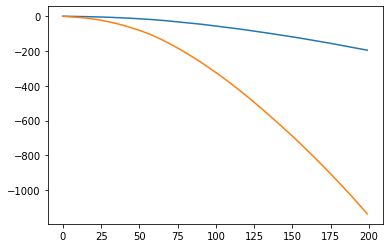

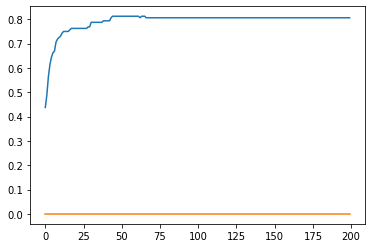

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

In [ ]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
EPOCHS     = 50
BATCH_SIZE = 8
VERBOSE    = 0
FOLDS      = 10

In [ ]:
kfold = StratifiedKFold(n_splits = FOLDS, shuffle = True, random_state = SEED)
estimators = make_pipeline(StandardScaler(), KerasClassifier(build_fn = baseline_model, epochs = EPOCHS, batch_size = BATCH_SIZE, verbose = VERBOSE))
results = cross_val_score(estimators, X, Y_encoded, cv = kfold)
print (f'Mean Accuracy : {round(results.mean()*100,2)} %, Std. dev : {round(results.std()*100,2)}%')

Mean Accuracy : 69.74 %, Std. dev : 5.87%


In [ ]:
#trying a smaller network
%%time 
def small_model():
    model = Sequential()
    model.add(Dense(30, input_dim=(13), activation = 'relu'))
    model.add(Dense(1, activation = 'sigmoid'))
    model.compile(loss = 'binary_crossentropy', metrics = ['accuracy'], optimizer = 'adam')
    return model

kfold = StratifiedKFold(n_splits = FOLDS, shuffle = True, random_state = SEED)
estimators = make_pipeline(StandardScaler(), KerasClassifier(build_fn = small_model, epochs = EPOCHS, batch_size = BATCH_SIZE, verbose = VERBOSE))
results = cross_val_score(estimators, X, Y_encoded, cv = kfold)
print (f'Mean Accuracy : {round(results.mean()*100,2)} %, Std. dev : {round(results.std()*100,2)}%')

Mean Accuracy : 70.29 %, Std. dev : 5.26%
CPU times: user 19.6 s, sys: 1.35 s, total: 21 s
Wall time: 17.4 s


In [ ]:
#trying multiple layer perceptron
%%time 
def large_model():
    model = Sequential()
    model.add(Dense(13, input_dim=(13), activation = 'relu'))
    model.add(Dense(13, activation = 'relu'))
    model.add(Dense(1, activation = 'sigmoid'))
    model.compile(loss = 'binary_crossentropy', metrics = ['accuracy'], optimizer = 'adam')
    return model

kfold = StratifiedKFold(n_splits = FOLDS, shuffle = True, random_state = SEED)
estimators = make_pipeline(StandardScaler(), KerasClassifier(build_fn = large_model, epochs = EPOCHS, batch_size = BATCH_SIZE, verbose = VERBOSE))
results = cross_val_score(estimators, X, Y_encoded, cv = kfold)
print (f'Mean Accuracy : {round(results.mean()*100,2)} %, Std. dev : {round(results.std()*100,2)}%')

Mean Accuracy : 70.29 %, Std. dev : 4.64%
CPU times: user 21.6 s, sys: 1.61 s, total: 23.2 s
Wall time: 19.1 s
